Importing the Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('depression_dataset_reddit.csv')
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [ ]:
df.tail()

,clean_text,is_depression
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0
7730,slept wonderfully finally tried swatching for ...,0


Grpahs and plots

c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_depression', ylabel='count'>

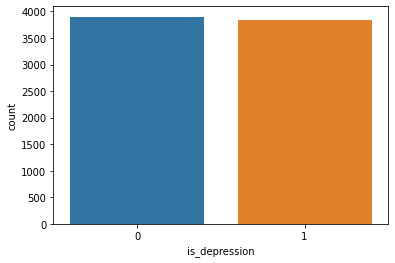

In [ ]:
#PLotting the count of each class
sns.countplot(df['is_depression'])


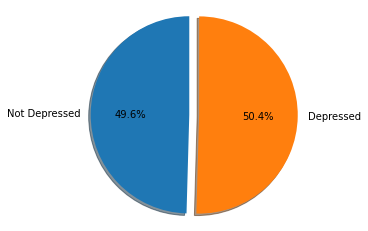

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
labels = 'Not Depressed', 'Depressed'
sizes = [df['is_depression'].value_counts()[1],df['is_depression'].value_counts()[0]]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Input other libraries and necessary files

In [ ]:
import re
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization

In [ ]:
lemmatize=nltk.WordNetLemmatizer()

In [ ]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['clean_text'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatize.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count=CountVectorizer(stop_words="english",max_features=550)#it removes unnecesarry words and finds most using 550 words

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

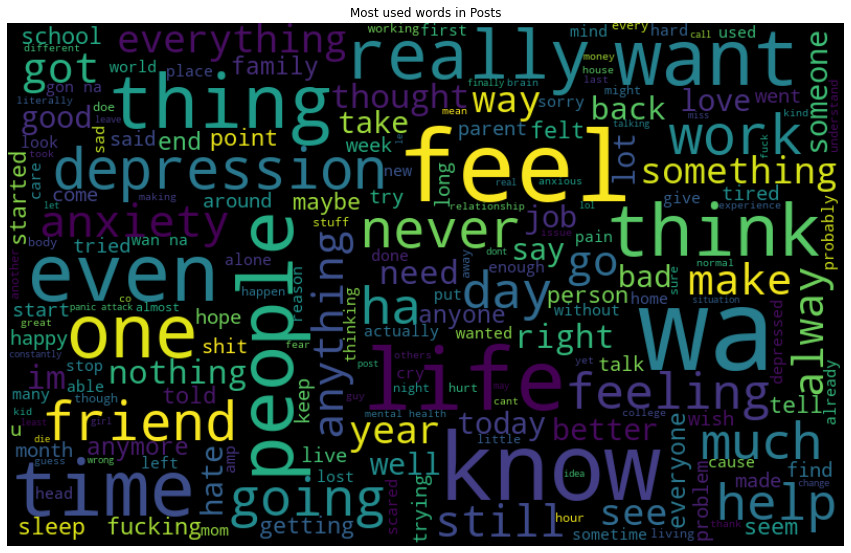

In [ ]:
#We need convert all reivews to single text
all_words=' '.join([text for text in corpus])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most used words in Posts") 
plt.show()

In [ ]:
matrix=count.fit_transform(corpus).toarray()
matrix

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Defining the target and attributes

In [ ]:
x=matrix
y=df["is_depression"]

Spliting  X and y into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
classifier.score(x_test,y_test)

0.936005171299289

Plotting the confusion matrix

<AxesSubplot:>

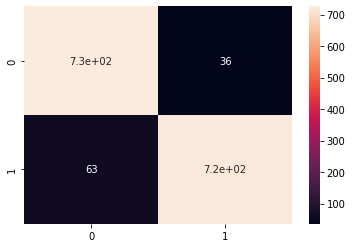

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,classifier.predict(x_test))
sns.heatmap(cm,annot=True)


Trying  other naive bayes models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


In [ ]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)

0.8894634776987718

<AxesSubplot:>

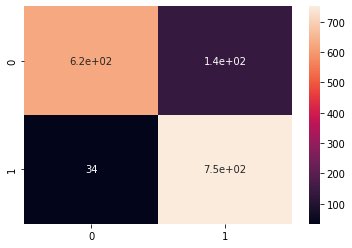

In [ ]:
cm=confusion_matrix(y_test,nb.predict(x_test))
sns.heatmap(cm,annot=True)


In [ ]:
bn=BernoulliNB()
bn.fit(x_train,y_train)
bn.score(x_test,y_test)


0.8571428571428571

<AxesSubplot:>

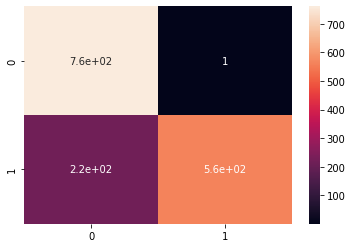

In [ ]:
cm=confusion_matrix(y_test,bn.predict(x_test))
sns.heatmap(cm,annot=True)


Finding the optimal value for var_smoothing in GaussianNB

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       762
           1       0.96      0.92      0.94       785

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



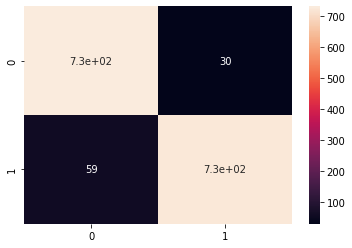

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

classifier=GaussianNB(var_smoothing=0.0001)
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

cm=confusion_matrix(y_test,classifier.predict(x_test))
sns.heatmap(cm,annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
sample="There are people out there enjoying life, are rich as hell and have made more money in a day than I will in my entire life. Yet here I am struggling, jobless actually avoiding working for my families sake while this pandemic goes on. Either way I just feel like a failure, I'd love to be rich doesn't everyone? Yet I just don't have the confidence or see myself ever making it. I have a degree in computer networking too, yet I've only had one IT related job since then and it was pretty basic and poor pay and I eventually lost the job. Being an extreme introvert really doesn't help in social life, job life and if you are an introvert I'd say there's probably less chance of being rich and successful though obviously it isn't impossible. My life is in no means actually bad though I have it fairly okay, even if I am eventually going to have to get a job if my money gets too low. It just sucks feeling the way I do and feeling like a failure."

In [ ]:
#lemmatize the sample
sample=re.sub('[^a-zA-Z]',' ',sample)
sample=sample.lower()
sample=sample.split()
sample=[lemmatize.lemmatize(word) for word in sample if not word in stopwords.words('english')]
sample=' '.join(sample)


In [ ]:
#convert sample to matrix
sample=count.transform([sample]).toarray()
sample

array([[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
        0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

In [ ]:
#predict the sample
classifier.predict(sample)
prediction=classifier.predict(sample)
if prediction==1:
    print("Depressed")
else:
    print("Not Depressed")
    

Depressed


AUC: 0.96


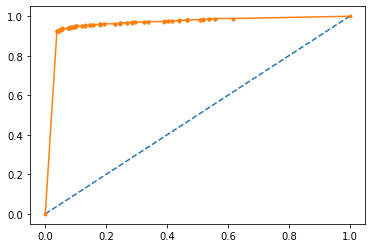

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = classifier.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()